In [914]:
#untuk pemrosesan data
import pandas as pd
import numpy as np

#untuk keperluan plotting
import matplotlib.pyplot as plt
import seaborn as sns

#analisis statistik
import scipy.stats
from scipy import stats
import scipy.stats as scistats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

# Data Preparing 

In [915]:
#memanggil data bank-additional-full.csv dan menghilangkan format ';'
bank_add = pd.read_csv('E:/HACKTIV8/assgn_3/bank-additional-full.csv', sep=';')
bank_add

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [916]:
bank_add.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [917]:
bank_add.shape

(41188, 21)

In [918]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [919]:
#mengumpulkan nama-nama kolom yang tipe data nya numerik
numerical = list(bank_add.select_dtypes(include=['int64']).columns.values) + list(bank_add.select_dtypes(include=['float64']).columns.values)
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [920]:
#mengumpulkan nama-nama kolom yang tipe data nya categorical
categorical = list(bank_add.select_dtypes(include=['object']))
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [921]:
#deskriptif statistik data numerik
bank_add[numerical].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [922]:
#deskriptif statistik data kategori
bank_add[categorical].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [923]:
#pengelompokan data pada kolom y dan menghitung jumlah data pada tiap kelompok
bank_add.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


dapat dilihat jumlah 'no' sebanyak 36548 data. sedangkan 'yes' sebanyak 4640 data.

In [924]:
for cat in categorical:
    print("Nilai unik untuk kolom ", cat.upper())
    print(bank_add[cat].unique())
    print('='*30)
bank_add[categorical].nunique().sort_values(ascending = False)

Nilai unik untuk kolom  JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Nilai unik untuk kolom  MARITAL
['married' 'single' 'divorced' 'unknown']
Nilai unik untuk kolom  EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Nilai unik untuk kolom  DEFAULT
['no' 'unknown' 'yes']
Nilai unik untuk kolom  HOUSING
['no' 'yes' 'unknown']
Nilai unik untuk kolom  LOAN
['no' 'yes' 'unknown']
Nilai unik untuk kolom  CONTACT
['telephone' 'cellular']
Nilai unik untuk kolom  MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Nilai unik untuk kolom  DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
Nilai unik untuk kolom  POUTCOME
['nonexistent' 'failure' 'success']
Nilai unik untuk kolom  Y
['no' 'yes']


job            12
month          10
education       8
day_of_week     5
marital         4
default         3
housing         3
loan            3
poutcome        3
contact         2
y               2
dtype: int64

In [925]:
for num in numerical:
    print("Nilai unik untuk kolom ", num.upper())
    print(bank_add[num].unique())
    print('='*30)
bank_add[numerical].nunique().sort_values(ascending = False)

Nilai unik untuk kolom  AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik untuk kolom  DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik untuk kolom  CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik untuk kolom  PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Nilai unik untuk kolom  PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik untuk kolom  EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik untuk kolom  CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.7

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.price.idx      26
cons.conf.idx       26
nr.employed         11
emp.var.rate        10
previous             8
dtype: int64

In [926]:
#mengetahui jumlah "unknown" di setiap atribut
bank_add[bank_add[categorical] == 'unknown'].count().sort_values(ascending = False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [927]:
#mengganti 'unknown' menjadi nan
bank_add[bank_add[categorical] == "unknown"] = np.nan

Dikarenakan pada categorical dari data bank_add terdapat unknown, maka diubah menjadi NaN (Not a Number) agar nantinya pandas secara default tidak akan menganggap nilai "unknown" sebagai nilai yang valid.

In [928]:
#mengecek kembali jumlah "unknown" di setiap atribut
bank_add[bank_add[categorical] == 'unknown'].count().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [929]:
bank_add[categorical].head(20)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
5,services,married,basic.9y,NaN,no,no,telephone,may,mon,nonexistent,no
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no
7,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,nonexistent,no
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,no
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent,no


In [930]:
#jumlah missing values pada data train
print("Jumlah NaN missing values atribut kategori =",bank_add[categorical].isnull().sum().sum())
print("Jumlah NaN missing values atribut numerikal =",bank_add[numerical].isnull().sum().sum())

Jumlah NaN missing values atribut kategori = 12718
Jumlah NaN missing values atribut numerikal = 0


In [931]:
#melakukan imuter untuk menghilangkan missing value
categorical = list(bank_add.select_dtypes(include=['object']).columns)
for cat in categorical:
    imputer = SimpleImputer(strategy='most_frequent')
    bank_add[categorical] = imputer.fit_transform(bank_add[categorical])

In [932]:
#mengecek Jumlah NaN Missing Values setelah melakukan imputasi nilai missing values
print("JUMLAH NaN MISSING VALUES ATRIBUT KATEGORI FINAL =",bank_add[categorical].isnull().sum().sum())

JUMLAH NaN MISSING VALUES ATRIBUT KATEGORI FINAL = 0


Dapat dilihat bahwa, awalnya terdapat missing value pada data bank-additional-full berjumlah 12718 pada kolom bertipe data kategorikal dengan rincian default sebanyak 8597 data, education sebanyak 1731 data, housing sebanyak 990 data, loan sebanyak 990 data, job sebanyak 330 data, dan marital sebanyak 80 data. Namun, setelah 'unknown' dijadikan NaN dan dilakukan imutasi nilai missing value tersebut, maka jumlah missing values final untuk atribut kategorikal menjadi o. Maka, dapat dikatakan bahwa data ban-additional-full telah dapat digunakan untuk Visualisasi projects rubric.

# Visualisasi

In [933]:
bank_add.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [934]:
print("Jumlah Berlangganan Term Deposit = ", bank_add[categorical[10]].value_counts())

Jumlah Berlangganan Term Deposit =  y
no     36548
yes     4640
Name: count, dtype: int64


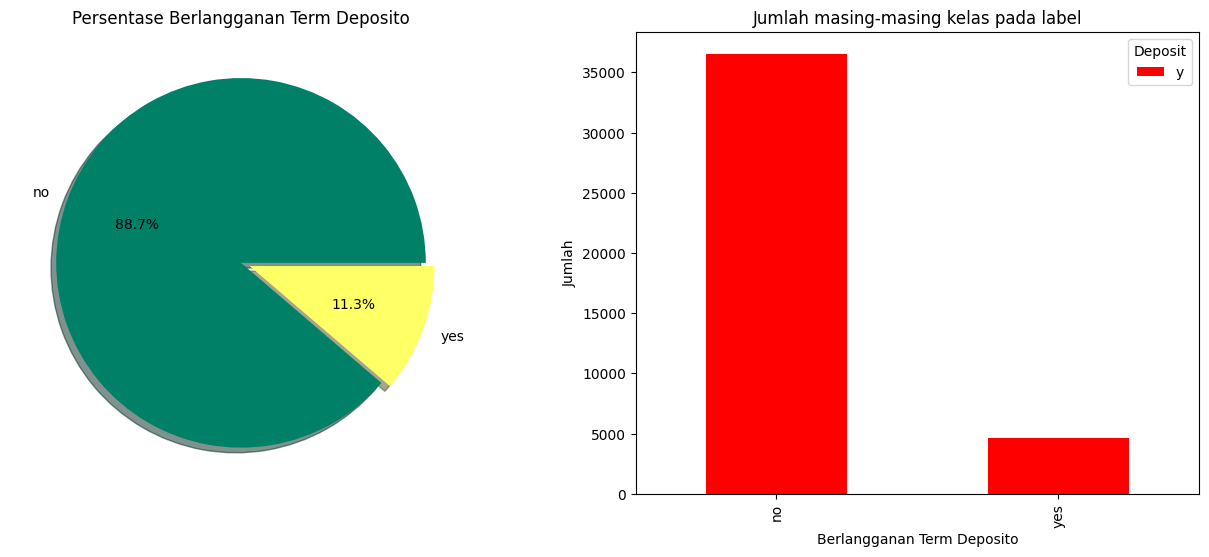

In [935]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "y (Berlangganan Term Deposit)"
bank_add['y'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='summer',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Berlangganan Term Deposito')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
bank_add.groupby('y').agg({'y':'count'}).plot(
    kind='bar',
    color='red',
    ax=ax[1]
)
ax[1].set_title('Jumlah masing-masing kelas pada label')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Berlangganan Term Deposito')
ax[1].legend(title='Deposit')

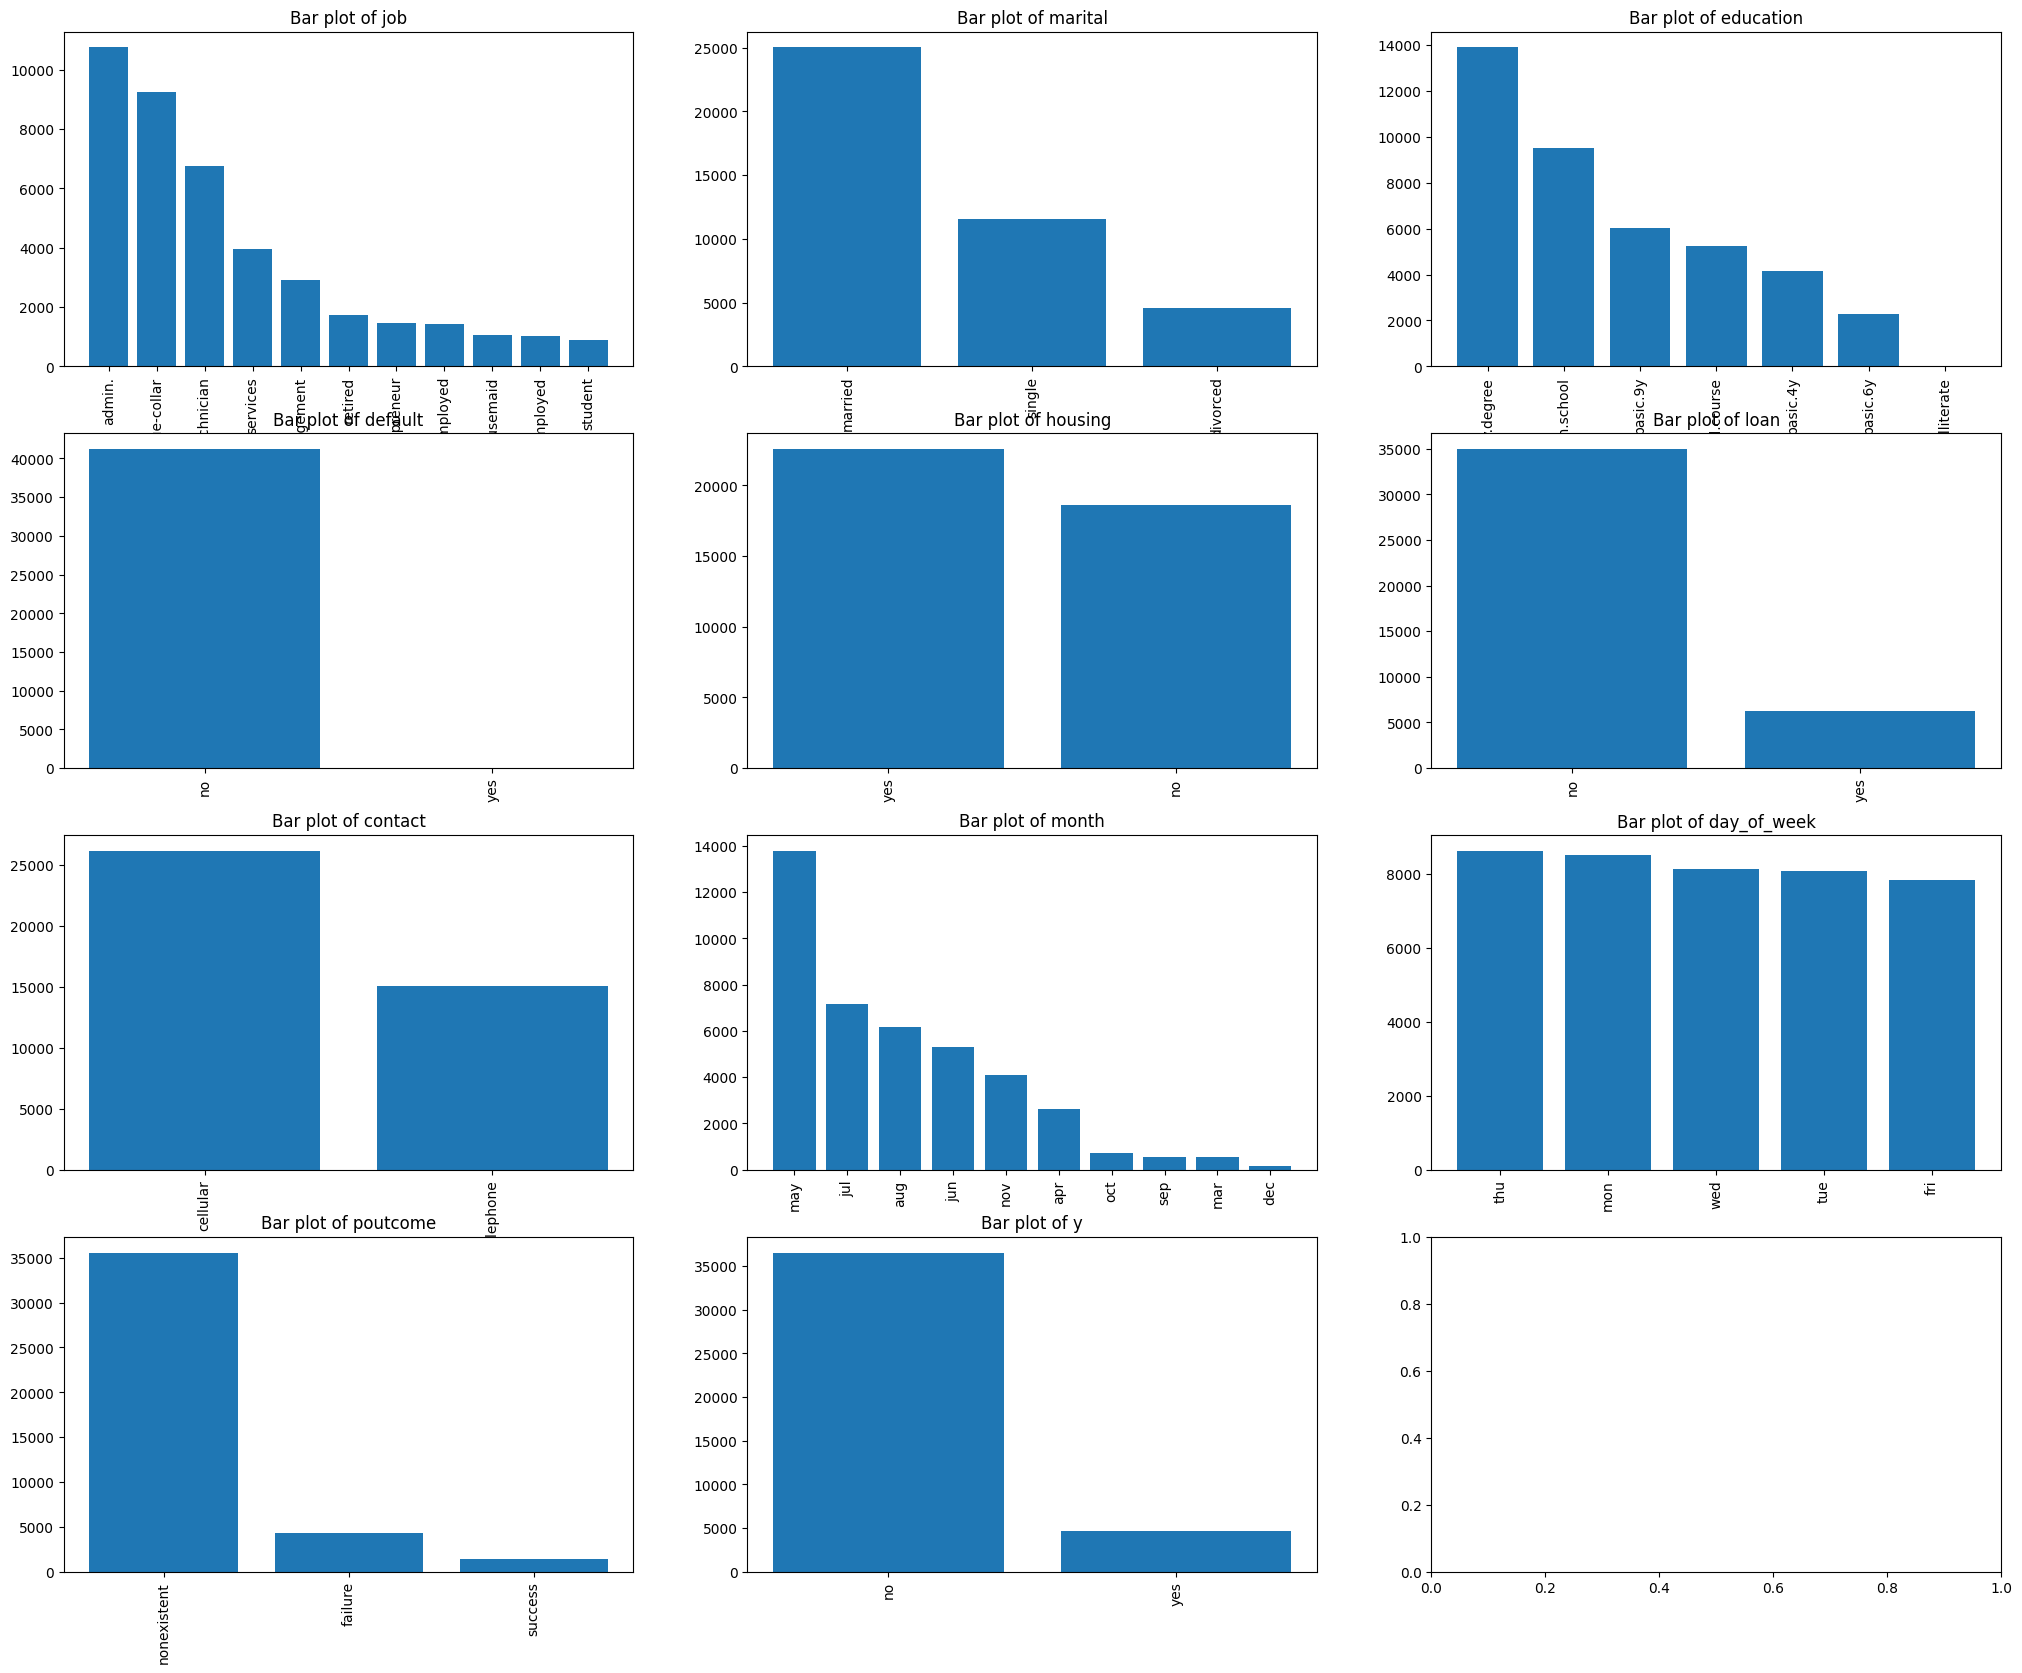

In [936]:
# Categorical columns exploration
fig, ax = plt.subplots(4,3, sharex=False, sharey=False, figsize=(25,20))
count = 0
for cat in categorical:
    value_count = bank_add[cat].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()

- Berdasarkan data visualisasi tersebut dapat dilihat bahwa Presentase berlangganan term deposito yaitu 88,7% untuk no (tidak berlangganan) dan 11,3% untuk yes (berlangganan), dimana tidak berlangganan berjumlah 36548 klien dan berlangganan berjumlah 4640 klien.
- Dapat dilihat bahwa dalam kategori job pada klien, pekerjaan admin memiliki jumlah terbanyak disusul oleh e-collar, dan yang paling rendah adalah student. Pada kolom marital (status pernikahan) klien, jumlah terbanyak ada pada married. Untuk education dari klien jumlah terbanyak adalah pelanggan yang bergelar degree. Lalu banyak dari klien yang memiliki pinjaman perumahan dibandingkan tidak dan banyak klien yang tidak memiliki pinjaman pribadi. Untuk jenis komunikasi kontak, kebanyakan melalui cellular dibandingkan telephone. Untuk month (kontak terakhir) yang tertinggi adalah dibulan mei, disusul bulan Juli, dan yang paling rendah adalah Desember. Untuk hari kontak terakhir dalam seminggunya yang tertinggi adalah hari Kamis dan yang paling rendah adalah Jumat. Untuk poutcome (hasil kampanye pemasaran) yang tertinggi adalah nonexistent (tidak ada) dan terendah adalah success (berhasil).

# Logistic Regression

In [937]:
# Identify predictor and target variable
predictors = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target = ['y']

In [938]:
# Identify numerical and categorical variables
numerical = bank_add.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = bank_add.select_dtypes(include=['object']).columns.tolist()

In [939]:
# memilih atribut nominal dari atribut kategori
nominal_columns = ['job', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
ordinal_columns = [col for col in categorical if col not in nominal_columns]

In [940]:
X = bank_add.drop('y', axis=1)  # remove 'y' column from predictors
y = bank_add['y']

In [945]:
ohe_bank_df = pd.get_dummies(bank_add[nominal_columns], columns=nominal_columns, prefix=nominal_columns)

# Combine encoded nominal variables with numerical variables
encode = pd.concat([bank_add[numerical], ohe_bank_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bank_add[predictors], bank_add[target], test_size=0.2, random_state=42)

#melakukan proses scaling pada variabel prediktor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [946]:
# Initialize logistic regression model and fit to training set
log_reg = LogisticRegression(max_iter=10000, solver='sag')
log_reg.fit(X_train, y_train.values.ravel())

# Make predictions using testing set
y_pred_log = log_reg.predict(X_test)

# Calculate model metrik-metrik
print('Accuracy:', accuracy_score(y_test, y_pred_log))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred_log))
print('Precision:', precision_score(y_test, y_pred_log, pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred_log, pos_label='yes'))
print('F1-score:', f1_score(y_test, y_pred_log, pos_label='yes'))

Accuracy: 0.9094440398154892
Confusion Matrix: [[7122  181]
 [ 565  370]]
Precision: 0.6715063520871143
Recall: 0.39572192513368987
F1-score: 0.4979811574697174


# K-Nearest Neighbors

In [949]:
#inisialisasi model K-Nearest Neighbors
k = 5 # jumlah K yang akan digunakan
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

#fit model ke training set
knn.fit(X_train_scaled, y_train.values.ravel())

#melakukan prediksi menggunakan testing set
y_pred_knn = knn.predict(X_test_scaled)

# Calculate model metrik-metrik
print('Model Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn, pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred_knn, pos_label='yes'))
print('F1-score:', f1_score(y_test, y_pred_knn, pos_label='yes'))

Model Accuracy: 0.9011896091284293
Confusion Matrix: [[6974  329]
 [ 485  450]]
Precision: 0.5776636713735558
Recall: 0.48128342245989303
F1-score: 0.5250875145857643


# Support Vector Machine

In [950]:
# Initialize SVM model and fit to training set
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train.values.ravel())

# Make predictions using testing set
y_pred_svm = svm.predict(X_test_scaled)

# Calculate model metrik-metrik
print('Model Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm, pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred_svm, pos_label='yes'))
print('F1-score:', f1_score(y_test, y_pred_svm, pos_label='yes'))

Model Accuracy: 0.8953629521728574
Confusion Matrix: [[7170  133]
 [ 729  206]]
Precision: 0.6076696165191741
Recall: 0.22032085561497325
F1-score: 0.3233908948194662


# Decision Tree

In [952]:
# Initialize decision tree classifier and fit to training set
dt = DecisionTreeClassifier(max_depth=10, random_state=10)
dt.fit(X_train_scaled, y_train)

# Make predictions using testing set
y_pred_dt = dt.predict(X_test_scaled)

# Calculate model metrics
print('Model Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt, pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred_dt, pos_label='yes'))
print('F1-score:', f1_score(y_test, y_pred_dt, pos_label='yes'))

Model Accuracy: 0.9085943190094683
Confusion Matrix: [[6985  318]
 [ 435  500]]
Precision: 0.6112469437652812
Recall: 0.5347593582887701
F1-score: 0.5704506560182544


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.608735 to fit



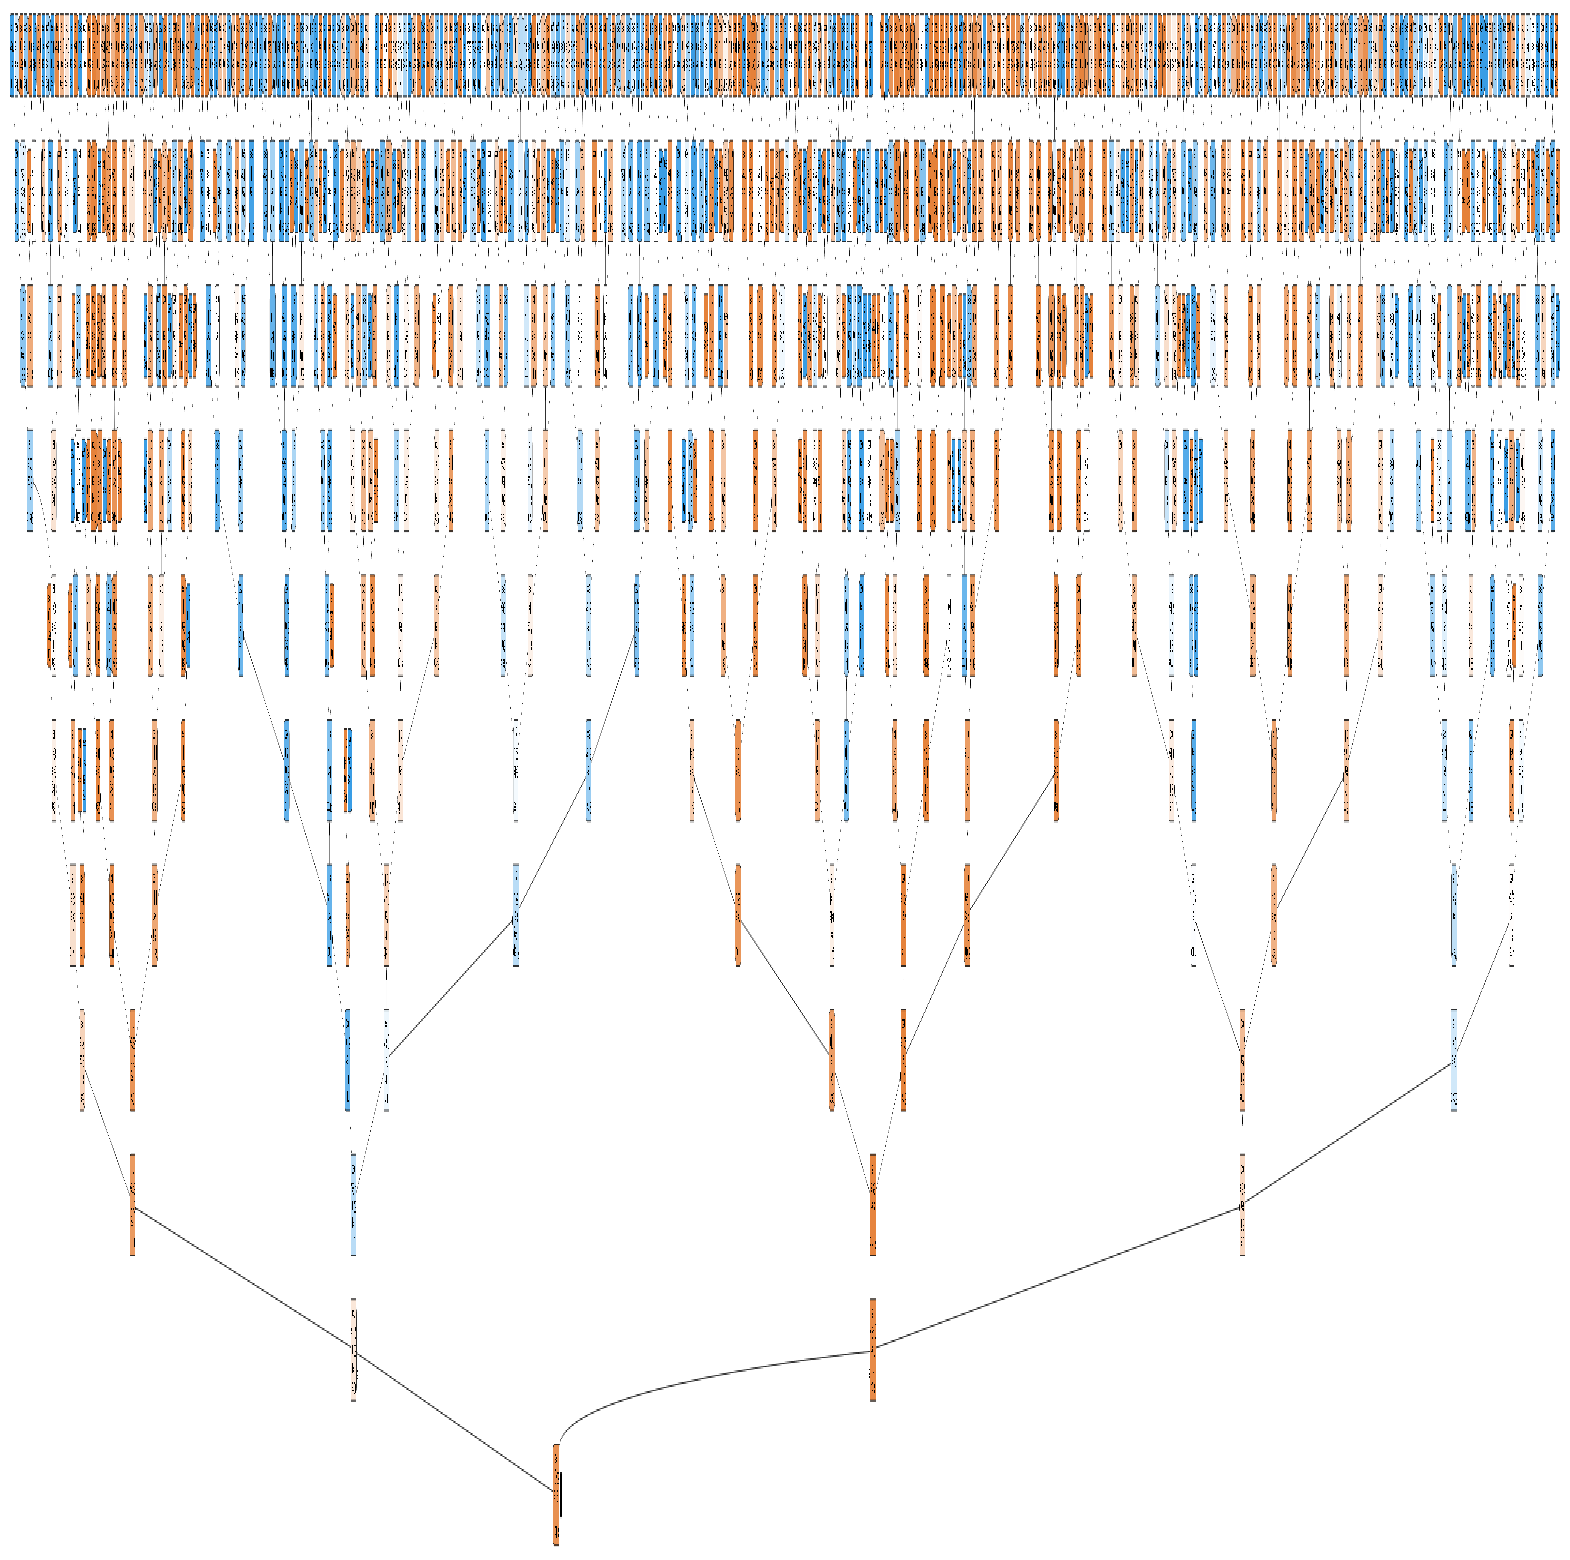

In [953]:
# Visualize decision tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = StringIO()
tree.export_graphviz(dt,
                     out_file=dot_data,
                     feature_names = X_train.columns,
                     class_names=['no', 'yes'],
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')  # save decision tree as png image

# Show decision tree image
plt.figure(figsize=(20, 20))
plt.imshow(plt.imread('decision_tree.png'), interpolation='nearest', aspect='auto', origin='lower', extent=[0, 1, 0, 1])
plt.axis('off')
plt.show()

# Random Forest

In [954]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train.values.ravel())
y_pred_rf = rf.predict(X_test)

# Calculate model metrics
print('Model Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf, pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred_rf, pos_label='yes'))
print('F1-score:', f1_score(y_test, y_pred_rf, pos_label='yes'))

Model Accuracy: 0.9168487496965283
Confusion Matrix: [[7061  242]
 [ 443  492]]
Precision: 0.670299727520436
Recall: 0.5262032085561498
F1-score: 0.5895745955662074


# Naive Bayes

In [955]:
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())
y_pred_nb = nb.predict(X_test)

# Calculate model metrik-metrik
print('Model Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred_nb))
print('Precision:', precision_score(y_test, y_pred_nb, pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred_nb, pos_label='yes'))
print('F1-score:', f1_score(y_test, y_pred_nb, pos_label='yes'))

Model Accuracy: 0.8708424374848264
Confusion Matrix: [[6613  690]
 [ 374  561]]
Precision: 0.44844124700239807
Recall: 0.6
F1-score: 0.5132662397072278


Untuk melakukan evaluasi performa model secara lebih komprehensif, dilakukan perhitungan metrik evaluasi seperti accuracy, confusion matrix, precision, recall, dan F1-score. Dari model-model diatas (Logistic Regression, K-Nearest Neighbour, Support Vector Machinee, Decision Tree, Random Forest, dan Naive Bayes) dapat dilihat bahwa dua model teratas yang memiliki akurasi yang baik adalah random forest dan logistic regression, sedangkan yang akurasinya kurang baik adalah Naive Bayes.